# Solving Linear Program Using Simplex Method
# Problem Statement
Find the optimal solution to the following linear programming problem using Basic Feasible Solutions

$$\begin{aligned}
&\min-4x_{1}-7x_{2} \\
&\mathrm{s.t.} \\
&\quad3x_1+x_2\leq6, \\
&\quad- 8x_{1}+x_{2}\leq5, \\
&\quad14x_1+x_2\leq9, \\
&\quad x_1,x_2\geq0
\end{aligned}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools


In [2]:
# plotting feasible region
# construct lines
x = np.linspace(-10, 10, 2000)

x1 = x * 0
x2 = 6 - 3*x
x3 = 5 + 8*x
x4 = 9 - 14*x


# Feasible Region

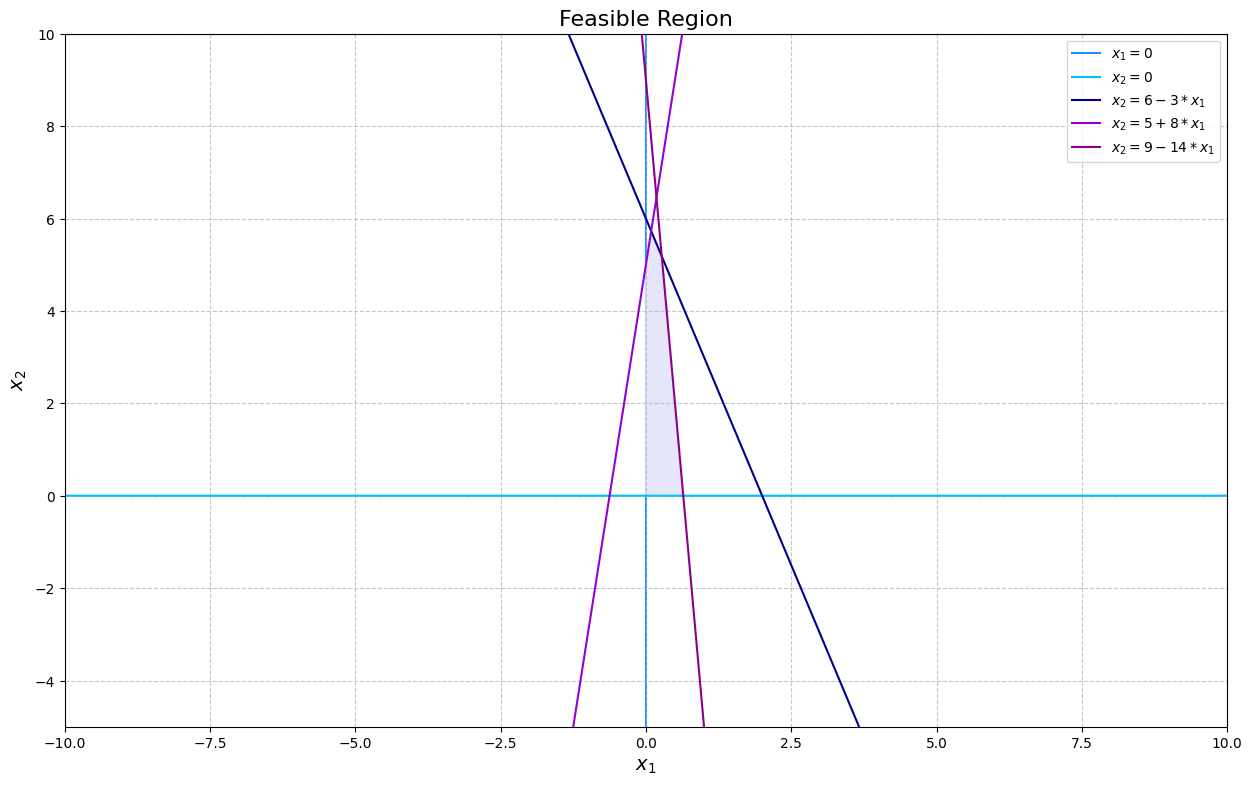

In [3]:
# make plot - draw the lines and corner points
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot()

# Plot lines
plt.plot([0, 0], [-5, 10], label=r'$x_1=0$', zorder=1, color='dodgerblue')
plt.plot(x, x1, label=r'$x_2=0$', zorder=2, color='deepskyblue')
plt.plot(x, x2, label=r'$x_2 = 6 - 3*x_1$', zorder=3, color='darkblue')
plt.plot(x, x3, label=r'$x_2 = 5 + 8*x_1$', zorder=4, color='darkviolet')
plt.plot(x, x4, label=r'$x_2 = 9 - 14*x_1$', zorder=5, color='darkmagenta')


# fill feasible region
plt.fill([0, 0.643, 0.273, 0.091, 0], [
         0, 0, 5.182, 5.727, 5], color='lavender')


# Set axis limits
plt.xlim((-10, 10))
plt.ylim((-5, 10))

# Label axis
plt.xlabel(r'$x_1$', fontsize=14)
plt.ylabel(r'$x_2$', fontsize=14)

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add title
plt.title('Feasible Region', fontsize=16)

# Show plot
plt.legend()
plt.show()


## Transform it into a standard form LP

$$\begin{aligned}\min&\quad\boldsymbol{c}^\top\boldsymbol{x}\\\mathrm{s.t.}&\quad\boldsymbol{A}\boldsymbol{x}=\boldsymbol{b}\\&\quad\boldsymbol{x}\geq\boldsymbol{0}\end{aligned}$$
  
  ## Standard Form
$$\begin{aligned}
&\min-4x_{1}-7x_{2} \\
&\mathrm{s.t.} \\
&\quad3x_1+x_2+x_3=6, \\
&\quad- 8x_{1}+x_{2}+x_4=5, \\
&\quad14x_1+x_2+x_5=9, \\
&\quad x_1,x_2,x_3,x_4,x_5\geq0
\end{aligned}
$$

In this case, the $\mathbf{c},\mathbf{A}$ and $\mathbf{b}$, are
$$\mathbf{c}=\begin{bmatrix}-4\\-7\\0\\0\\0\end{bmatrix},\quad\mathbf{A}=\begin{bmatrix}3&1&1&0&0\\-8&1&0&1&0\\14&1&0&0&1\end{bmatrix},\quad\mathbf{b}=\begin{bmatrix}6\\5\\9\end{bmatrix}$$

In [4]:
# Define matrices A, B, and C
A = np.array([
    [3, 1, 1, 0, 0],
    [-8, 1, 0, 1, 0],
    [14, 1, 0, 0, 1]
])

B = np.array([6, 5, 9])

C = np.array([-4, -7, 0, 0, 0])

all_col = [0, 1, 2, 3, 4]


#Method  I:  Solve the standard-form linear program by the simplex method

In [5]:
def Simplex_cal(basis):
    # Determine nonbasis variables
    nonbasis = [x for x in all_col if x not in basis]

    # Extract B matrix and its inverse
    B_matrix = A[:, basis]
    B_inverse = np.linalg.inv(B_matrix)

    # Compute xb and xn
    xb = B_inverse @ B
    xn = np.zeros_like(nonbasis)

    # Concatenate basis and nonbasis variables
    all_list = np.hstack((basis, nonbasis))

    # Construct full variable vector x_full
    x_full = np.hstack((xb, xn))

    # Order x_full according to all_list
    x_full_order = x_full[np.argsort(all_list)]

    # Calculate cj values for nonbasis variables
    c_list = []
    for i in nonbasis:
        cj = C[i] - C[basis] @ B_inverse @ A[:, i]
        c_list.append(cj)

    # Determine entering variable (changeb)
    changeb = nonbasis[np.argmin(c_list)]

    # Calculate db and dn
    db = -1 * B_inverse @ A[:, changeb]
    dn = np.zeros_like(nonbasis)
    dn[np.argmin(c_list)] = 1

    # Construct full direction vector d_full
    d_full = np.hstack((db, dn))

    # Order d_full according to all_list
    d_full_order = d_full[np.argsort(all_list)]

    # Calculate minimum ratio test
    min_ratio_result = np.divide(xb, -1 * db)
    theta = min(min_ratio_result[min_ratio_result >= 0])

    # Compute new solution x_new
    x_new = x_full_order + theta * d_full_order

    # Update basis and nonbasis variables
    basis_exist = basis[np.where(min_ratio_result == theta)[0][0]]
    basis_new = basis.copy()
    basis_new[np.where(min_ratio_result == theta)[0][0]] = changeb
    nonbasis_new = nonbasis.copy()
    nonbasis_new[np.argmin(c_list)] = basis_exist

    return [basis, nonbasis, list(x_full_order), c_list, changeb, basis_exist, theta,
            list(d_full_order), list(x_new), basis_new, nonbasis_new]


In [6]:
def print_result(simplex):
    print_basis = ['x' + str(i + 1) for i in simplex[0]]
    print_Nonbasis = ['x' + str(i + 1) for i in simplex[1]]
    print_basis_new = ['x' + str(i + 1) for i in simplex[9]]
    print_Nonbasis_new = ['x' + str(i + 1) for i in simplex[10]]

    # Print iteration header (assuming `no K` means removing the `k` reference)
    print(f'Result_iter: {k}')

    # Print current basis and nonbasis variables
    print(f'\nBasis is {print_basis} and Nonbasis is {print_Nonbasis}')

    # Print current x variables
    print(
        f'\nx variables in order are {simplex[2]}, and x1,x2 are {simplex[2][:2]}')

    # Print reduce cost of nonbasis variables
    print(f'\nReduce Cost of the nonbasis are {simplex[3]}')

    # Print entering and exiting variables
    print(
        f'\nx{simplex[4] + 1} will enter the basis variable and x{simplex[5] + 1} will exit the basis variable')

    # Print theta and direction vector d
    print(f'\nWith theta = {simplex[6]} and d = {simplex[7]}')

    # Print new x variables after iteration
    print(
        f'\nx new variables in order are {simplex[8]}, and x1,x2 are {simplex[8][:2]}')

    # Print new basis and nonbasis variables
    print(
        f'\nAnd New Basis are {print_basis_new} and New Nonbasis are {print_Nonbasis_new}')


In [7]:
k = 1
simplex_return = Simplex_cal(np.array([0, 2, 3]))
print_result(simplex_return)


Result_iter: 1

Basis is ['x1', 'x3', 'x4'] and Nonbasis is ['x2', 'x5']

x variables in order are [0.6428571428571428, 0.0, 4.071428571428571, 10.142857142857142, 0.0], and x1,x2 are [0.6428571428571428, 0.0]

Reduce Cost of the nonbasis are [-6.714285714285714, 0.2857142857142857]

x2 will enter the basis variable and x3 will exit the basis variable

With theta = 5.181818181818182 and d = [-0.07142857142857142, 1.0, -0.7857142857142857, -1.5714285714285714, 0.0]

x new variables in order are [0.2727272727272727, 5.181818181818182, 0.0, 2.0, 0.0], and x1,x2 are [0.2727272727272727, 5.181818181818182]

And New Basis are ['x1', 'x2', 'x4'] and New Nonbasis are ['x3', 'x5']


In [8]:
k += 1
new_iter_simplex = Simplex_cal(np.array([0, 2, 3]))[9]
simplex_return = Simplex_cal(new_iter_simplex)
print_result(simplex_return)


Result_iter: 2

Basis is ['x1', 'x2', 'x4'] and Nonbasis is ['x3', 'x5']

x variables in order are [0.27272727272727265, 5.181818181818182, 0.0, 2.0, 0.0], and x1,x2 are [0.27272727272727265, 5.181818181818182]

Reduce Cost of the nonbasis are [8.545454545454545, -1.5454545454545459]

x5 will enter the basis variable and x4 will exit the basis variable

With theta = 2.0 and d = [-0.0909090909090909, 0.27272727272727276, 0.0, -1.0, 1.0]

x new variables in order are [0.09090909090909086, 5.7272727272727275, 0.0, 0.0, 2.0], and x1,x2 are [0.09090909090909086, 5.7272727272727275]

And New Basis are ['x1', 'x2', 'x5'] and New Nonbasis are ['x3', 'x4']


In [9]:
k += 1
new_iter_simplex = Simplex_cal(new_iter_simplex)[9]
simplex_return = Simplex_cal(new_iter_simplex)
print_result(simplex_return)


Result_iter: 3

Basis is ['x1', 'x2', 'x5'] and Nonbasis is ['x3', 'x4']

x variables in order are [0.090909090909091, 5.727272727272727, 0.0, 0.0, 2.0], and x1,x2 are [0.090909090909091, 5.727272727272727]

Reduce Cost of the nonbasis are [5.454545454545453, 1.5454545454545459]

x4 will enter the basis variable and x5 will exit the basis variable

With theta = 2.0 and d = [0.0909090909090909, -0.27272727272727276, 0.0, 1.0, -1.0]

x new variables in order are [0.2727272727272728, 5.181818181818181, 0.0, 2.0, 0.0], and x1,x2 are [0.2727272727272728, 5.181818181818181]

And New Basis are ['x1', 'x2', 'x4'] and New Nonbasis are ['x3', 'x5']


In [10]:
k += 1
new_iter_simplex = Simplex_cal(new_iter_simplex)[9]
simplex_return = Simplex_cal(new_iter_simplex)
print_result(simplex_return)


Result_iter: 4

Basis is ['x1', 'x2', 'x4'] and Nonbasis is ['x3', 'x5']

x variables in order are [0.27272727272727265, 5.181818181818182, 0.0, 2.0, 0.0], and x1,x2 are [0.27272727272727265, 5.181818181818182]

Reduce Cost of the nonbasis are [8.545454545454545, -1.5454545454545459]

x5 will enter the basis variable and x4 will exit the basis variable

With theta = 2.0 and d = [-0.0909090909090909, 0.27272727272727276, 0.0, -1.0, 1.0]

x new variables in order are [0.09090909090909086, 5.7272727272727275, 0.0, 0.0, 2.0], and x1,x2 are [0.09090909090909086, 5.7272727272727275]

And New Basis are ['x1', 'x2', 'x5'] and New Nonbasis are ['x3', 'x4']


In [11]:
k += 1
new_iter_simplex = Simplex_cal(new_iter_simplex)[9]
simplex_return = Simplex_cal(new_iter_simplex)
print_result(simplex_return)


Result_iter: 5

Basis is ['x1', 'x2', 'x5'] and Nonbasis is ['x3', 'x4']

x variables in order are [0.090909090909091, 5.727272727272727, 0.0, 0.0, 2.0], and x1,x2 are [0.090909090909091, 5.727272727272727]

Reduce Cost of the nonbasis are [5.454545454545453, 1.5454545454545459]

x4 will enter the basis variable and x5 will exit the basis variable

With theta = 2.0 and d = [0.0909090909090909, -0.27272727272727276, 0.0, 1.0, -1.0]

x new variables in order are [0.2727272727272728, 5.181818181818181, 0.0, 2.0, 0.0], and x1,x2 are [0.2727272727272728, 5.181818181818181]

And New Basis are ['x1', 'x2', 'x4'] and New Nonbasis are ['x3', 'x5']


# Conclusion - Method I
Based on the simplex algorithm's output:

- The reduced costs of the nonbasic variables are `[5.4545, 1.5455]`. This indicates that any movement in these directions would increase the objective function value. Therefore, the algorithm has identified an optimal solution.
  
- The optimal values for `x1` and `x2` are found to be `[0.0909, 5.7273]`.

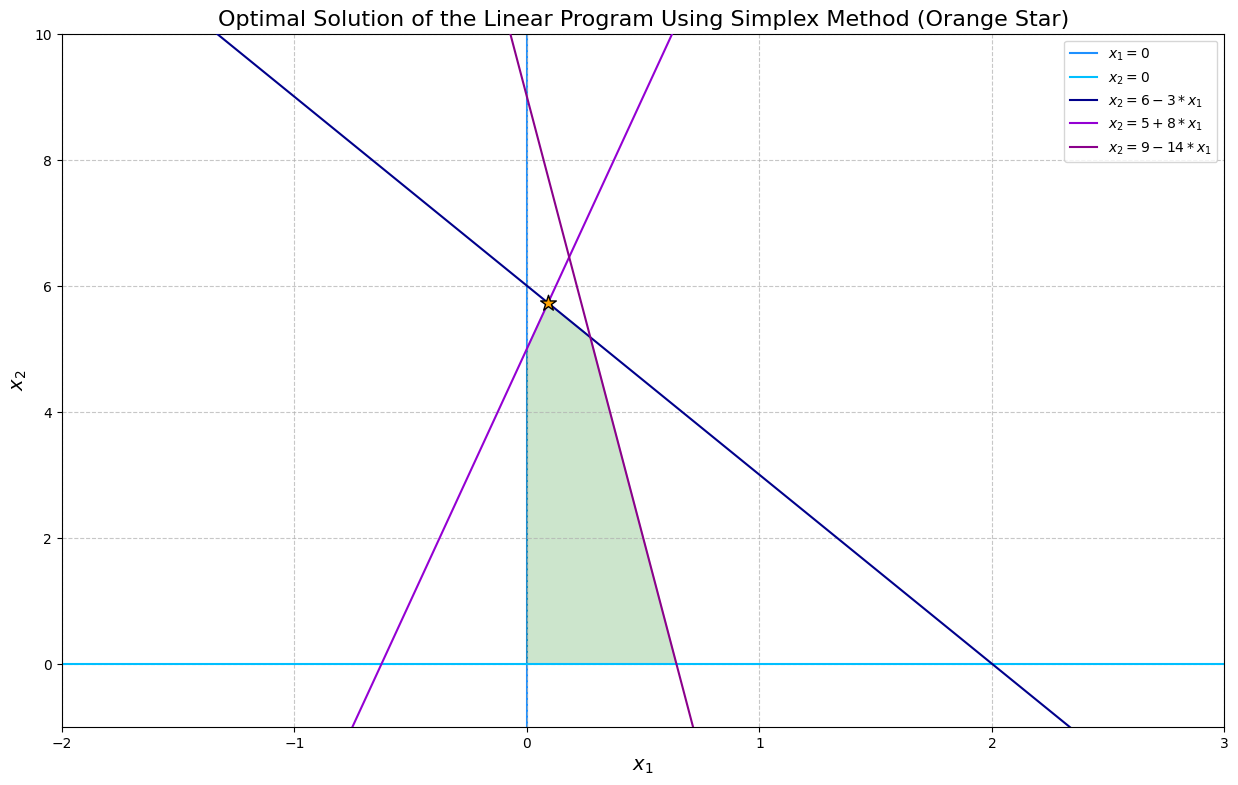

In [12]:
# Generate x values for plotting
x = np.linspace(-10, 10, 2000)

# Define lines for constraints
x1 = x * 0
x2 = 6 - 3 * x
x3 = 5 + 8 * x
x4 = 9 - 14 * x


# Create the plot
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot()

# Plot constraint lines
plt.plot([0, 0], [-5, 10], label=r'$x_1=0$', zorder=1, color='dodgerblue')
plt.plot(x, x1, label=r'$x_2=0$', zorder=2, color='deepskyblue')
plt.plot(x, x2, label=r'$x_2 = 6 - 3*x_1$', zorder=3, color='darkblue')
plt.plot(x, x3, label=r'$x_2 = 5 + 8*x_1$', zorder=4, color='darkviolet')
plt.plot(x, x4, label=r'$x_2 = 9 - 14*x_1$', zorder=5, color='darkmagenta')

# Fill the feasible region based on hardcoded coordinates
plt.fill([0, 0.643, 0.273, 0.091, 0], [
         0, 0, 5.182, 5.727, 5], color='green', alpha=0.2)


plt.scatter(0.0909, 5.7273, color='orange', marker='*',
            s=140, zorder=7, edgecolors='black')

# Set axis limits
plt.xlim((-2, 3))
plt.ylim((-1, 10))

# Label axes
plt.xlabel(r'$x_1$', fontsize=14)
plt.ylabel(r'$x_2$', fontsize=14)

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add title
plt.title('Optimal Solution of the Linear Program Using Simplex Method (Orange Star)', fontsize=16)

# Show legend
plt.legend()

# Show plot
plt.show()


# Method II - Solving Linear Programs Using Basic Feasible Solutions

In [13]:
# List of all column indices
all_col = [0, 1, 2, 3, 4]

# Initialize empty lists for various purposes
bi_list = []  # To store b_i values
xb_list = []  # To store x_b values
xn_list = []  # To store x_n values
cb_list = []  # To store c_b values
cn_list = []  # To store c_n values
iter_list = []  # To store iteration numbers
not_select_list = []  # To store indices not selected

# Generate all combinations of three columns from the list of all columns
combine_list = list(itertools.combinations(all_col, 3))

# Output the list of combinations
combine_list

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4)]

In [14]:
# Initialize iteration counter
iter = 0

# Loop through each combination of columns
for i in combine_list:
    # Determine the columns not selected in the current combination
    not_select = [x for x in all_col if x not in i]

    # Extract submatrix corresponding to the selected columns
    bi = A[:, i]

    # Calculate x_b by solving the linear system
    xb = np.dot(np.linalg.inv(A[:, i]), B)

    # Initialize x_n with zeros
    xn = [0, 0]

    # Extract cost coefficients for the selected and non-selected columns
    cb = C[list(i)]
    cn = C[not_select]

    # Append the results to the corresponding lists
    bi_list.append(bi)
    xb_list.append(xb)
    xn_list.append(xn)
    cb_list.append(cb)
    cn_list.append(cn)
    not_select_list.append(not_select)
    iter_list.append(iter)

    # Increment the iteration counter
    iter += 1


In [15]:
# Generate x_list_temp by creating strings 'x1', 'x2', etc. for each element in combine_list
x_list_temp = np.array(['x' + str(num + 1)
                       for row in combine_list for num in row])

# Reshape x_list_temp to match the shape of combine_list
x_list = x_list_temp.reshape(np.array(combine_list).shape)

# Print the reshaped x_list
print(x_list)
print('\n' + '-' * 40 + '\n')

# Generate not_list_temp by creating strings 'x1', 'x2', etc. for each element in not_select_list
not_list_temp = np.array(['x' + str(num + 1)
                         for row in not_select_list for num in row])

# Reshape not_list_temp to match the shape of not_select_list
xn_xlist = not_list_temp.reshape(np.array(not_select_list).shape)

# Print the reshaped xn_xlist
print(xn_xlist)


[['x1' 'x2' 'x3']
 ['x1' 'x2' 'x4']
 ['x1' 'x2' 'x5']
 ['x1' 'x3' 'x4']
 ['x1' 'x3' 'x5']
 ['x1' 'x4' 'x5']
 ['x2' 'x3' 'x4']
 ['x2' 'x3' 'x5']
 ['x2' 'x4' 'x5']
 ['x3' 'x4' 'x5']]

----------------------------------------

[['x4' 'x5']
 ['x3' 'x5']
 ['x3' 'x4']
 ['x2' 'x5']
 ['x2' 'x4']
 ['x2' 'x3']
 ['x1' 'x5']
 ['x1' 'x4']
 ['x1' 'x3']
 ['x1' 'x2']]


In [16]:
# Loop through each iteration in iter_list
for i in iter_list:
    # Print the solution number and the corresponding B and C sets
    print(f"Solution {i + 1}:")
    print(f'B = {x_list[i]}  C = {xn_xlist[i]}')
    print('-' * 60)
    print('\n\n')

    # Print the matrix and vectors for the current solution
    print(f"B{i + 1}:")
    print(bi_list[i])
    print(f"\nXb{i + 1}: {xb_list[i]}")
    print(f"Xn{i + 1}: {xn_list[i]}")
    print(f"\nCb{i + 1}: {cb_list[i]}")
    print(f"Cn{i + 1}: {cn_list[i]}")
    print('\n' + '-' * 40 + '\n')


Solution 1:
B = ['x1' 'x2' 'x3']  C = ['x4' 'x5']
------------------------------------------------------------



B1:
[[ 3  1  1]
 [-8  1  0]
 [14  1  0]]

Xb1: [ 0.18181818  6.45454545 -1.        ]
Xn1: [0, 0]

Cb1: [-4 -7  0]
Cn1: [0 0]

----------------------------------------

Solution 2:
B = ['x1' 'x2' 'x4']  C = ['x3' 'x5']
------------------------------------------------------------



B2:
[[ 3  1  0]
 [-8  1  1]
 [14  1  0]]

Xb2: [0.27272727 5.18181818 2.        ]
Xn2: [0, 0]

Cb2: [-4 -7  0]
Cn2: [0 0]

----------------------------------------

Solution 3:
B = ['x1' 'x2' 'x5']  C = ['x3' 'x4']
------------------------------------------------------------



B3:
[[ 3  1  0]
 [-8  1  0]
 [14  1  1]]

Xb3: [0.09090909 5.72727273 2.        ]
Xn3: [0, 0]

Cb3: [-4 -7  0]
Cn3: [0 0]

----------------------------------------

Solution 4:
B = ['x1' 'x3' 'x4']  C = ['x2' 'x5']
------------------------------------------------------------



B4:
[[ 3  1  0]
 [-8  0  1]
 [14  0  0]]

Xb4:

In [17]:
# Concatenate combine_list and not_select_list for each combination
list_concatenated = [list(combine_list[i]) + not_select_list[i]
                     for i in range(len(combine_list))]

# Concatenate xb_list and xn_list for each solution
x_concatenated = [list(xb_list[i]) + xn_list[i] for i in range(len(xb_list))]


In [18]:
# Initialize lists to store feasibility status and objective function values
feasible_list = []
obj_list = []

# Loop through each concatenated list of variables and their values
for i in range(len(list_concatenated)):
    # Retrieve values for x1 and x2 from x_concatenated
    x1 = x_concatenated[i][list_concatenated[i].index(0)]
    x2 = x_concatenated[i][list_concatenated[i].index(1)]

    # Check feasibility based on given constraints
    feasibility = "Feasible" if all([
        (3 * x1 + x2 <= 6),
        (-8 * x1 + x2 <= 5),
        (14 * x1 + x2 <= 9),
        (x1 >= 0),
        (x2 >= 0)
    ]) else "Not Feasible"

    # Append feasibility status to the list
    feasible_list.append(feasibility)

    # Calculate the objective function value and append to the list
    obj_list.append(-4 * x1 - 7 * x2)

# Loop through each solution
for i in range(len(feasible_list)):
    # Print the solution number, feasibility status, and objective value
    print(
        f"Solution {iter_list[i] + 1}: {feasible_list[i]}     Objective Value:   {obj_list[i]:.2f}")


Solution 1: Not Feasible     Objective Value:   -45.91
Solution 2: Feasible     Objective Value:   -37.36
Solution 3: Feasible     Objective Value:   -40.45
Solution 4: Feasible     Objective Value:   -2.57
Solution 5: Not Feasible     Objective Value:   2.50
Solution 6: Not Feasible     Objective Value:   -8.00
Solution 7: Not Feasible     Objective Value:   -63.00
Solution 8: Feasible     Objective Value:   -35.00
Solution 9: Not Feasible     Objective Value:   -42.00
Solution 10: Feasible     Objective Value:   0.00


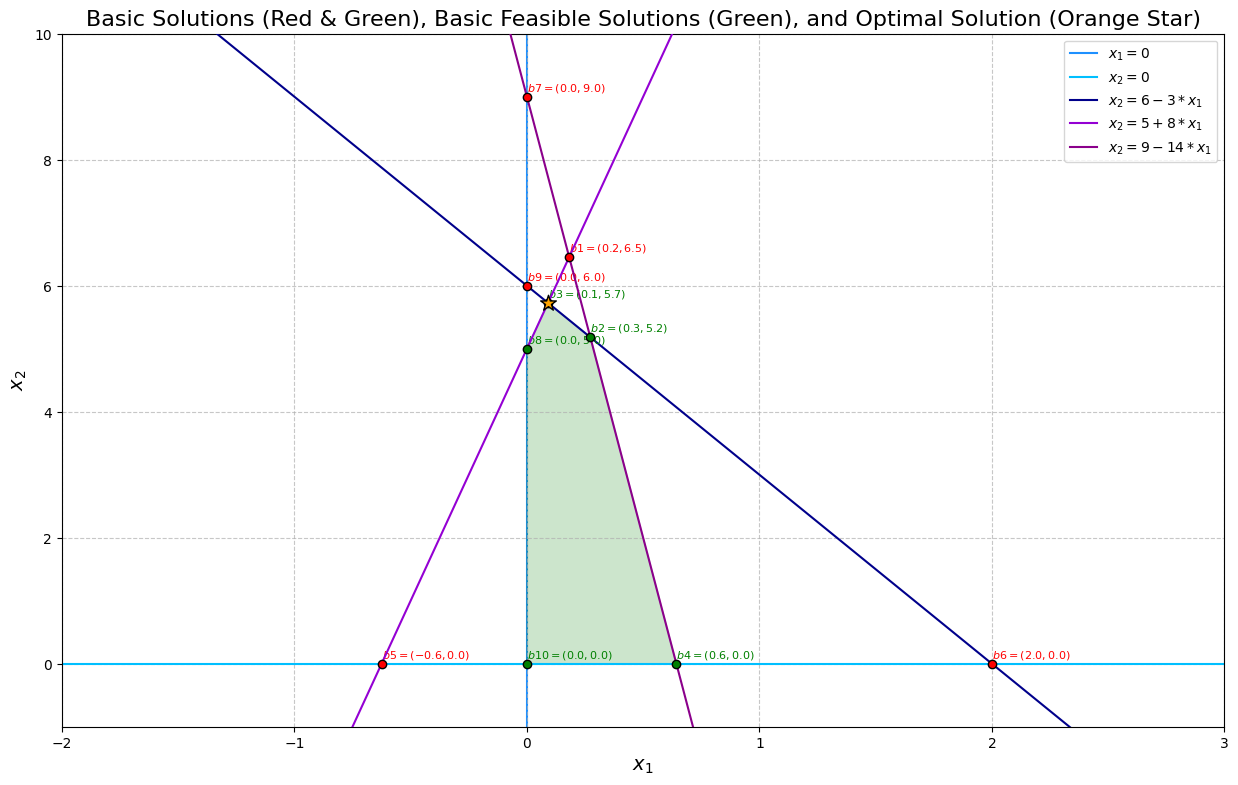

In [19]:
# Generate x values for plotting
x = np.linspace(-10, 10, 2000)

# Define lines for constraints
x1 = x * 0
x2 = 6 - 3 * x
x3 = 5 + 8 * x
x4 = 9 - 14 * x

# Find the index of the solution with the minimum objective value among feasible solutions
min_index = min((idx for idx, val in enumerate(feasible_list)
                if val == 'Feasible'), key=lambda idx: obj_list[idx])

# Create the plot
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot()

# Plot constraint lines
plt.plot([0, 0], [-5, 10], label=r'$x_1=0$', zorder=1, color='dodgerblue')
plt.plot(x, x1, label=r'$x_2=0$', zorder=2, color='deepskyblue')
plt.plot(x, x2, label=r'$x_2 = 6 - 3*x_1$', zorder=3, color='darkblue')
plt.plot(x, x3, label=r'$x_2 = 5 + 8*x_1$', zorder=4, color='darkviolet')
plt.plot(x, x4, label=r'$x_2 = 9 - 14*x_1$', zorder=5, color='darkmagenta')

# Fill the feasible region based on hardcoded coordinates
plt.fill([0, 0.643, 0.273, 0.091, 0], [
         0, 0, 5.182, 5.727, 5], color='green', alpha=0.2)

# Plot basic solutions and annotate them
for i in range(len(list_concatenated)):
    x1 = x_concatenated[i][list_concatenated[i].index(0)]
    x2 = x_concatenated[i][list_concatenated[i].index(1)]

    # Scatter plot for basic solutions
    plt.scatter(x1, x2, color='green' if feasible_list[i] ==
                'Feasible' else 'red', marker='o', zorder=7, edgecolors='black')

    # Annotation for basic solutions
    ax.annotate(f'$b{i+1} = ({x1:.1f}, {x2:.1f})$', (x1, x2 + 0.1),
                color='green' if feasible_list[i] == 'Feasible' else 'red', fontsize=8)

    # Highlight optimal solution with an asterisk
    if i == min_index:
        plt.scatter(x1, x2, color='orange', marker='*',
                    s=140, zorder=7, edgecolors='black')

# Set axis limits
plt.xlim((-2, 3))
plt.ylim((-1, 10))

# Label axes
plt.xlabel(r'$x_1$', fontsize=14)
plt.ylabel(r'$x_2$', fontsize=14)

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add title
plt.title('Basic Solutions (Red & Green), Basic Feasible Solutions (Green), and Optimal Solution (Orange Star)', fontsize=16)

# Show legend
plt.legend()

# Show plot
plt.show()
